In [42]:
import timeit
tic = timeit.default_timer()
import numpy as np
import pandas as pd

In [43]:
data = pd.read_csv('good_reads_final.csv')
data = data.replace('\n','', regex=True)

In [44]:
data.shape

(22891, 20)

In [45]:
newList = []

for each in data['author_genres']:
    s=list(each)
    s[-1]=''
    del(s[-1])
    new = "".join(s)
    newList.append(new)

data['author_genres'] = newList
    

In [46]:
for each in data:
    data[each].replace('', np.nan, inplace=True)
    data.dropna(subset=[each], inplace=True)
data

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,historical-fiction,74489,Victoria Thompson,/author/show/74489.Victoria_Thompson,74399,6268,United States,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers",706255,Stieg Larsson,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,romance,5618190,Mimi Jean Pamfiloff,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir",37871,José Donoso,/author/show/37871.Jos_Donoso,5522,489,Chile,4.14,https://www.goodreads.com/book/show/382975.The...,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy",36122,Patricia C. Wrede,/author/show/36122.Patricia_C_Wrede,291013,13453,United States,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,Sorcery & Cecelia: or The Enchanted Choc...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22886,3.94,female,humor-and-comedy,108007,Dakota Cassidy,/author/show/108007.Dakota_Cassidy,52944,4558,,3.82,https://www.goodreads.com/book/show/24614174-g...,24614174,Gotta Have Faith,Fantasy,Romance,430,33,72,2015,1215
22887,4.29,male,suspense,7063660,Joanne Jaytanie,/author/show/7063660.Joanne_Jaytanie,902,428,United States,4.56,https://www.goodreads.com/book/show/31429117-p...,31429117,Payton's Pursuit,Romance,Fantasy,82,57,342,2014,1321
22888,4.00,female,romance,6543639,Krystal Shannan,/author/show/6543639.Krystal_Shannan,15626,3530,United States,3.73,https://www.goodreads.com/book/show/35892811-m...,35892811,My Viking Vampire,Fantasy,Paranormal,2698,375,237,January 1st 2014,1679
22889,4.20,female,paranormal,5246010,Bryce Evans,/author/show/5246010.Bryce_Evans,4689,828,,3.89,https://www.goodreads.com/book/show/17187320-t...,17187320,The Trinity,Fantasy,Paranormal,356,38,222,December 28th 2012,1897


In [47]:
data_frame_trimmed = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(data_frame_trimmed.shape)

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

states = {
        'AK': 'United States',
        'AL': 'United States',
        'AR': 'United States',
        'AS': 'United States',
        'AZ': 'United States',
        'CA': 'United States',
        'CO': 'United States',
        'CT': 'United States',
        'DC': 'United States',
        'DE': 'United States',
        'FL': 'United States',
        'GA': 'United States',
        'GU': 'United States',
        'HI': 'United States',
        'IA': 'United States',
        'ID': 'United States',
        'IL': 'United States',
        'IN': 'United States',
        'KS': 'United States',
        'KY': 'United States',
        'LA': 'United States',
        'MA': 'United States',
        'MD': 'United States',
        'ME': 'United States',
        'MI': 'United States',
        'MN': 'United States',
        'MO': 'United States',
        'MP': 'United States',
        'MS': 'United States',
        'MT': 'United States',
        'NA': 'United States',
        'NC': 'United States',
        'ND': 'United States',
        'NE': 'United States',
        'NH': 'United States',
        'NJ': 'United States',
        'NM': 'United States',
        'NV': 'United States',
        'NY': 'United States',
        'OH': 'United States',
        'OK': 'United States',
        'OR': 'United States',
        'PA': 'United States',
        'PR': 'United States',
        'RI': 'United States',
        'SC': 'United States',
        'SD': 'United States',
        'TN': 'United States',
        'TX': 'United States',
        'UT': 'United States',
        'VA': 'United States',
        'VI': 'United States',
        'VT': 'United States',
        'WA': 'United States',
        'WI': 'United States',
        'WV': 'United States',
        'WY': 'United States'
}

BirthList =[]

for each in data_frame_trimmed['birthplace']:
    BirthList.append(each)
    
birthInsert = []

for each in data_frame_trimmed:
    data_frame_trimmed[each].replace('', np.nan, inplace=True)
    data_frame_trimmed.dropna(subset=[each], inplace=True)

def unique(list1): 
    x = np.array(list1) 
    return(np.unique(x)) 

temp_list = []

for each in BirthList:
    if each in us_state_abbrev:
        each = us_state_abbrev[each]
    temp_list.append(each)

for each in temp_list:
    if each in states:
        each = states[each]
    birthInsert.append(each)

#print(unique(birthInsert))

len(birthInsert)

(22610, 20)


22610

In [48]:
data['birthplace'] = birthInsert

In [49]:
for each in data:
    data[each].replace('', np.nan, inplace=True)
    data.dropna(subset=[each], inplace=True)

In [50]:
data.shape

(18237, 20)

In [51]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,historical-fiction,74489,Victoria Thompson,/author/show/74489.Victoria_Thompson,74399,6268,United States,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers",706255,Stieg Larsson,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,The Girl with the Dragon Tattoo,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,romance,5618190,Mimi Jean Pamfiloff,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir",37871,José Donoso,/author/show/37871.Jos_Donoso,5522,489,Chile,4.14,https://www.goodreads.com/book/show/382975.The...,382975,The Obscene Bird of Night,Fiction,Magical Realism,1844,173,438,1970,1533
4,4.10,female,"young-adult,fantasy",36122,Patricia C. Wrede,/author/show/36122.Patricia_C_Wrede,291013,13453,United States,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,Sorcery & Cecelia: or The Enchanted Choc...,Fantasy,Young Adult,17051,1890,326,April 15th 1988,2105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22883,4.13,female,"romance,paranormal",3393956,Nicky Charles,/author/show/3393956.Nicky_Charles,79447,5478,Canada,4.00,https://www.goodreads.com/book/show/13248590-t...,13248590,The Mating: The Original Law of the Lyca...,Fantasy,Romance,24847,2126,348,January 1st 2010,1021
22884,4.08,female,paranormal,12020546,S.D. Wasley,/author/show/12020546.S_D_Wasley,569,165,Australia,4.05,https://www.goodreads.com/book/show/24474924-t...,24474924,The Seventh,Young Adult,Fantasy,155,35,262,2015,1000
22887,4.29,male,suspense,7063660,Joanne Jaytanie,/author/show/7063660.Joanne_Jaytanie,902,428,United States,4.56,https://www.goodreads.com/book/show/31429117-p...,31429117,Payton's Pursuit,Romance,Fantasy,82,57,342,2014,1321
22888,4.00,female,romance,6543639,Krystal Shannan,/author/show/6543639.Krystal_Shannan,15626,3530,United States,3.73,https://www.goodreads.com/book/show/35892811-m...,35892811,My Viking Vampire,Fantasy,Paranormal,2698,375,237,January 1st 2014,1679


In [52]:
#drop countries whose count is less than 100
data = data.groupby('birthplace').filter(lambda x:len(x)>=100)

In [53]:
data['publish_date'] = data['publish_date'].str[-4:]
       
for ind in data.index:
    if(data['publish_date'][ind][-2:].isdigit() == False):
        data = data.drop(ind)
for ind in data.index:
    if(data['publish_date'][ind][-4:].isdigit() == False):
        if(data['publish_date'][ind][-2:].isdigit() == False):
            data = data.drop(ind)
        elif(int(data['publish_date'][ind][-2:]) < 10):
            data['publish_date'][ind] = "20" + data['publish_date'][ind][-2:]
        elif(int(data['publish_date'][ind][-2:]) >= 10):
            data['publish_date'][ind] = "19" + data['publish_date'][ind][-2:]

c:\users\nitesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nitesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\nitesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [54]:
data.to_csv("Cleaned_DataSet.csv")

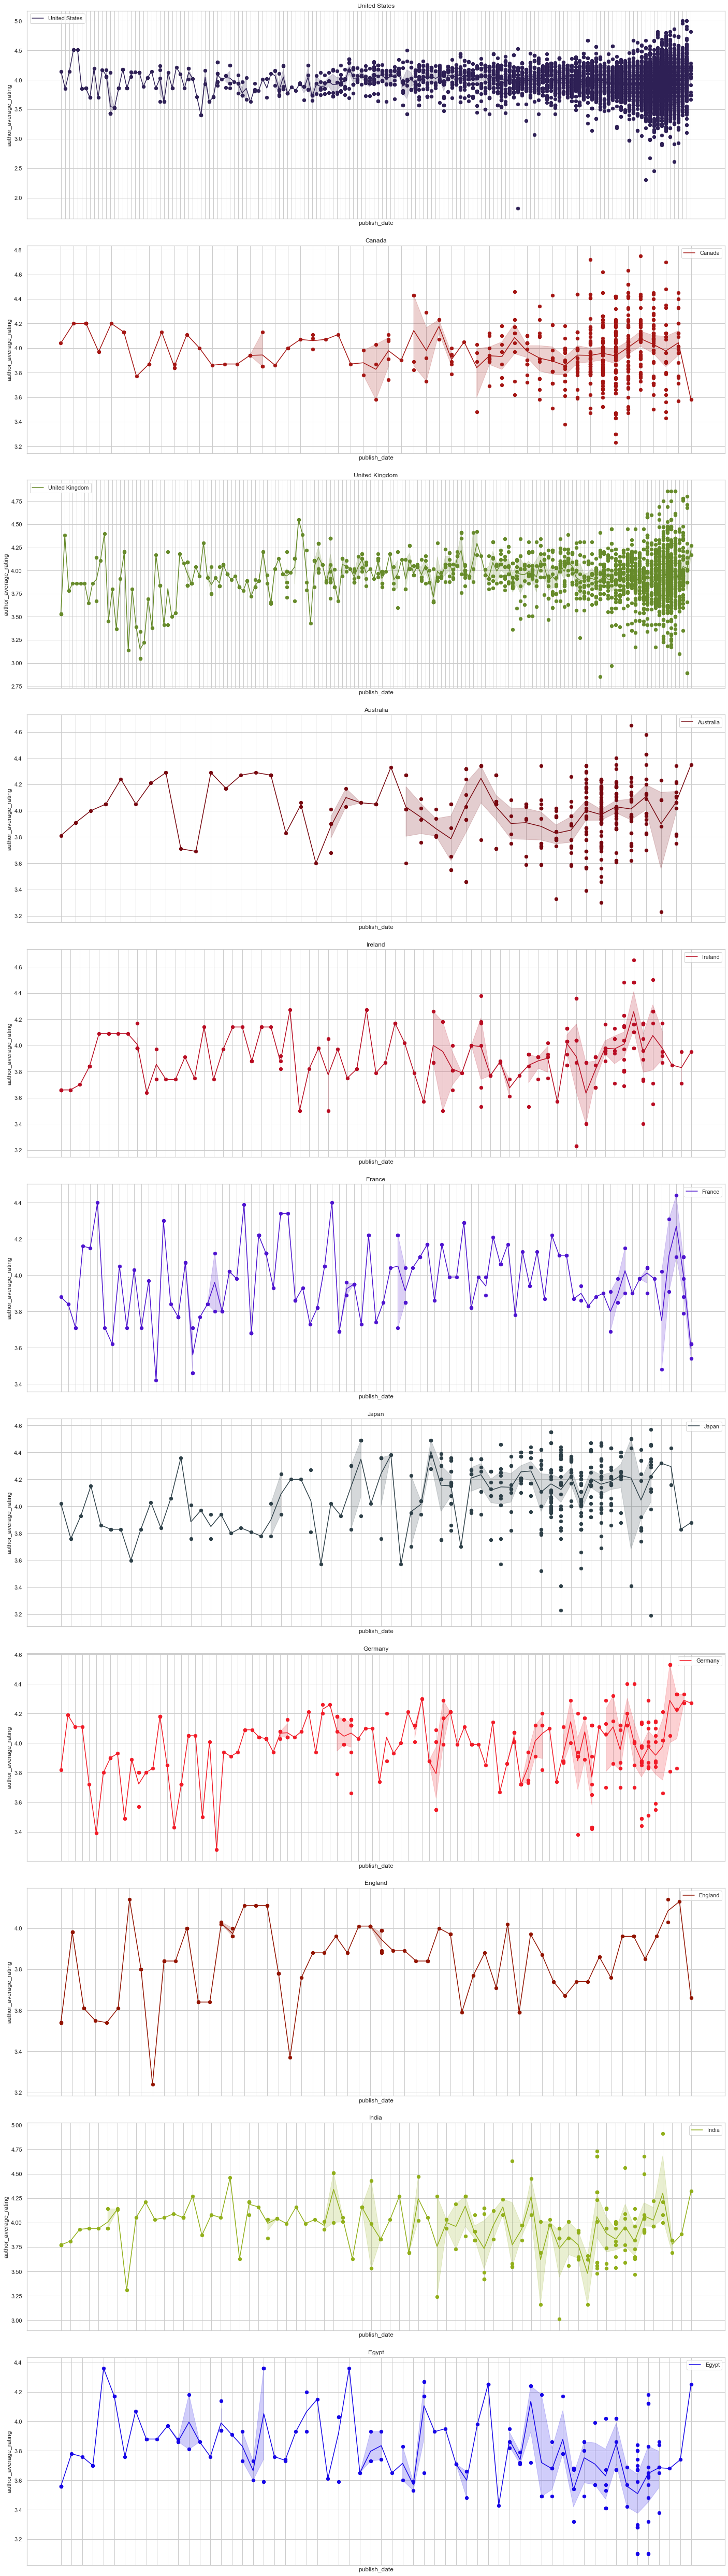

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set(style='whitegrid')
plt.figure(figsize=(20,70))

count=1

plt.rcParams.update({'font.size': 22})
unique_birth = data.birthplace.unique()


for each in unique_birth:
    #print(each)
    plt.subplot(11,1,count)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF')for j in range (6)])
    sns.lineplot(data[data.birthplace == each]['publish_date'],data[data.birthplace == each]['author_average_rating'],label = each,color=col)
    plt.title(each)
    plt.scatter(data[data.birthplace == each]['publish_date'],data[data.birthplace == each]['author_average_rating'],color=col,s=40)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

Text(0, 0.5, 'Author Count')

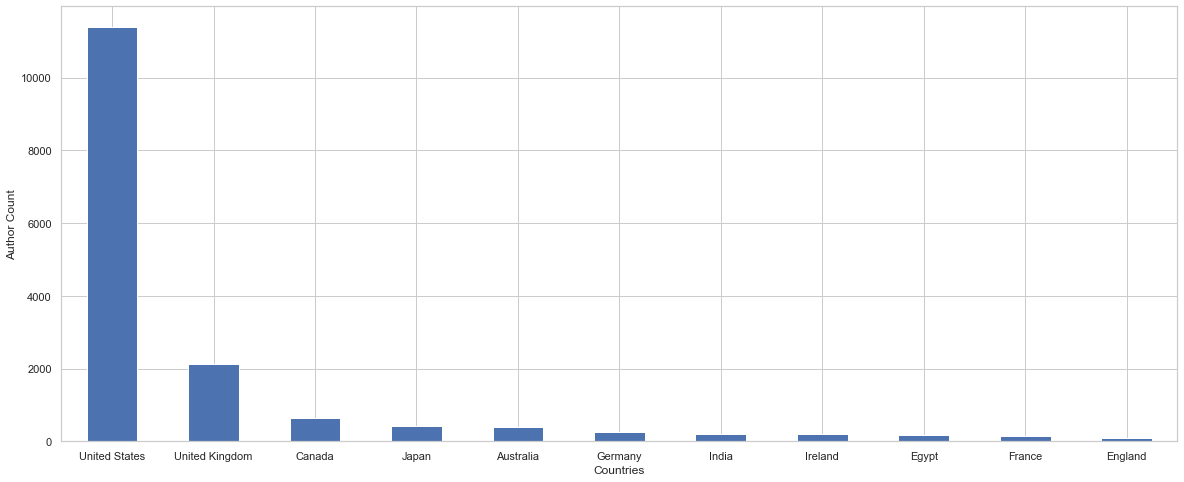

In [56]:
ax=data['birthplace'].value_counts().plot.bar(figsize=(20,8),rot = 0)
ax.set_xlabel('Countries')
ax.set_ylabel('Author Count')

In [57]:
data['author_gender'].value_counts()

male      8618
female    7441
Name: author_gender, dtype: int64

In [58]:
data.head()

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,historical-fiction,74489,Victoria Thompson,/author/show/74489.Victoria_Thompson,74399,6268,United States,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,Murder on St. Mark's Place,Mystery,Historical,5260,375,277,2000,3230
2,4.00,female,romance,5618190,Mimi Jean Pamfiloff,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,Tailored for Trouble,Romance,Contemporary,2151,391,354,2016,4585
4,4.10,female,"young-adult,fantasy",36122,Patricia C. Wrede,/author/show/36122.Patricia_C_Wrede,291013,13453,United States,4.01,https://www.goodreads.com/book/show/64207.Sorc...,64207,Sorcery & Cecelia: or The Enchanted Choc...,Fantasy,Young Adult,17051,1890,326,1988,2105
5,3.77,male,horror,58947,Steve Niles,/author/show/58947.Steve_Niles,47938,3240,United States,3.80,https://www.goodreads.com/book/show/831829.30_...,831829,"30 Days of Night, Vol. 1",Sequential Art,Sequential Art,17122,561,104,2004,4372
7,3.94,female,nonfiction,7956,Mary Roach,/author/show/7956.Mary_Roach,321197,29747,United States,3.84,https://www.goodreads.com/book/show/5981308-bonk,5981308,Bonk: The Curious Coupling of Science an...,Nonfiction,Science,45963,4268,319,2008,2054


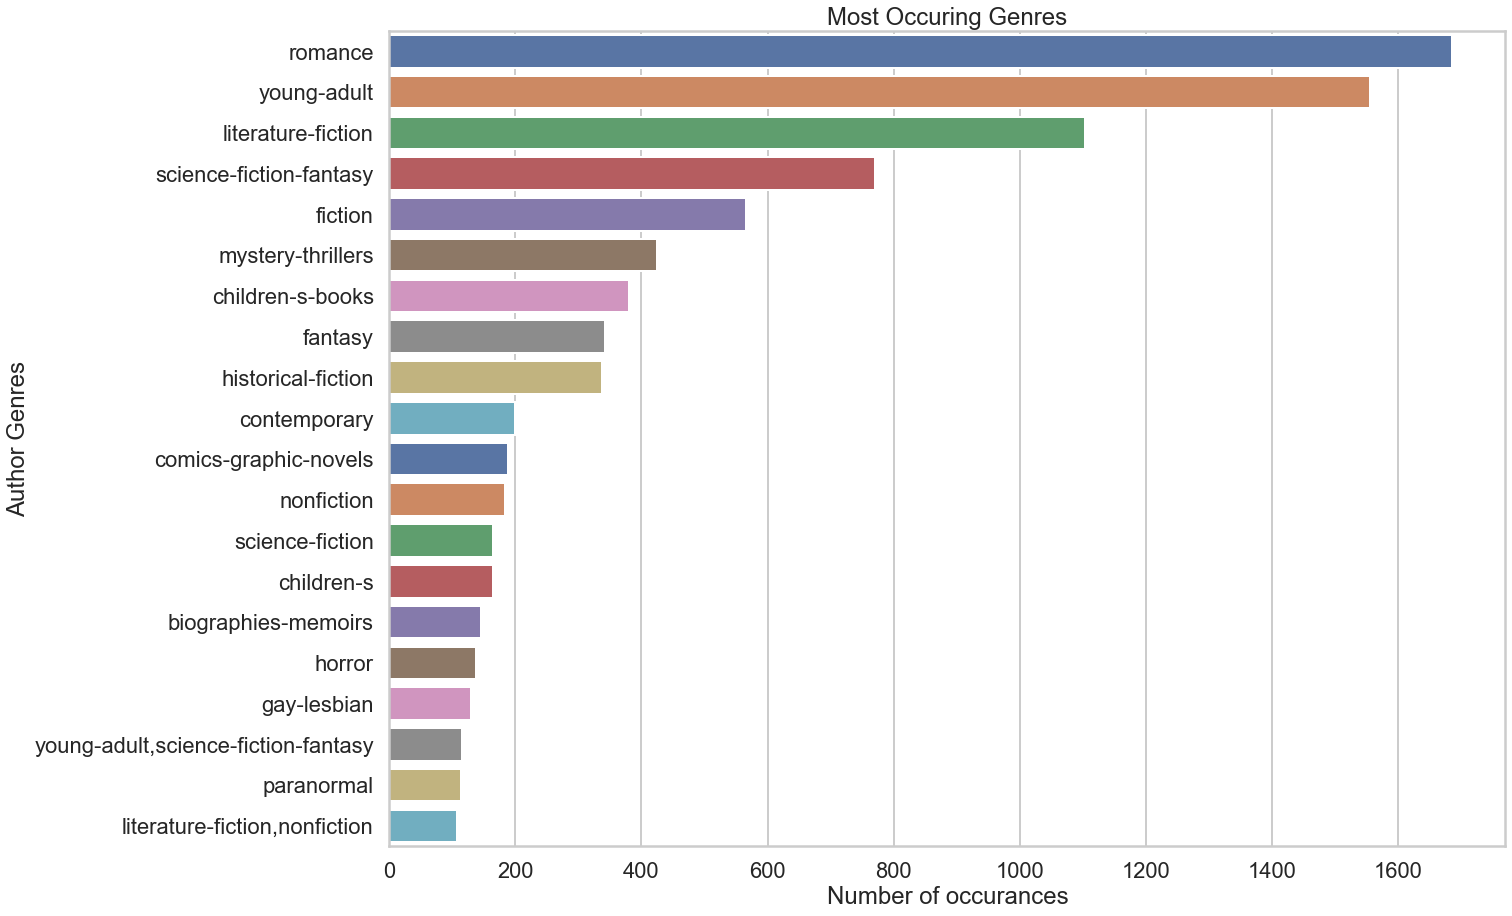

In [59]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
genre_list= data['author_genres']
genres=genre_list.value_counts()[:20]
sns.barplot(x=genres,y=genres.index,palette='deep')
plt.title("Most Occuring Genres")
plt.xlabel("Number of occurances")
plt.ylabel("Author Genres")
plt.show()

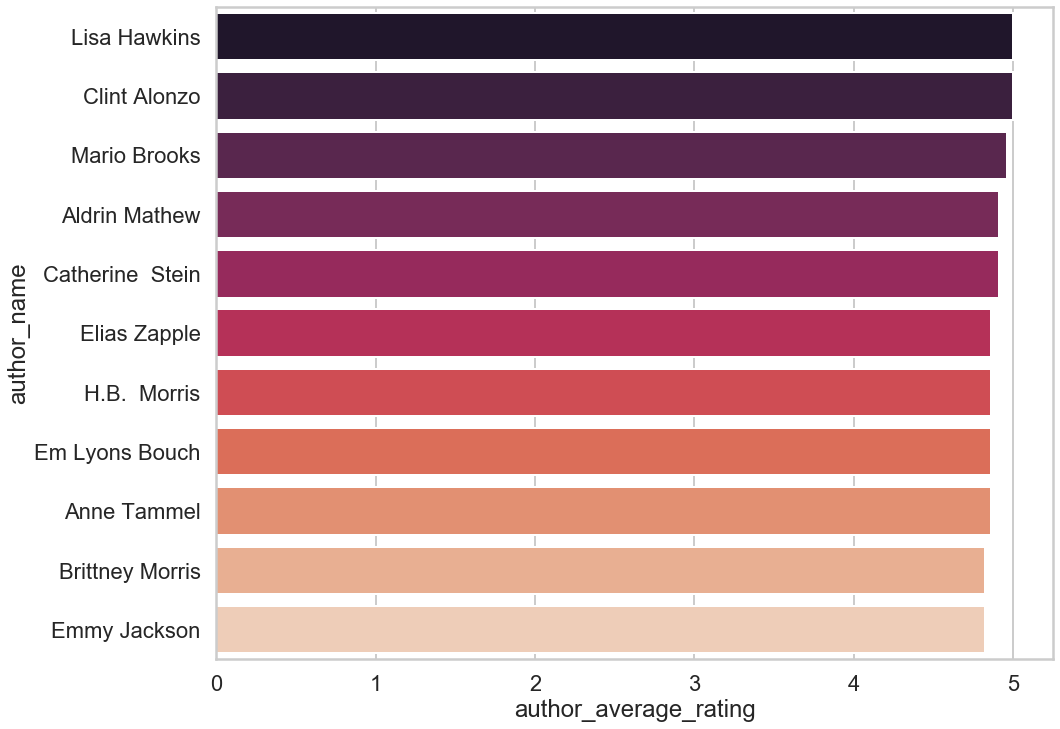

In [60]:
most_rated = data.sort_values('author_average_rating', ascending = False).head(14).set_index('author_name')
plt.figure(figsize=(15,12))
sns.barplot(most_rated['author_average_rating'], most_rated.index, palette='rocket')
plt.show()

In [61]:
top_authors= []
top_authors= data['author_name'].value_counts().head(5).index

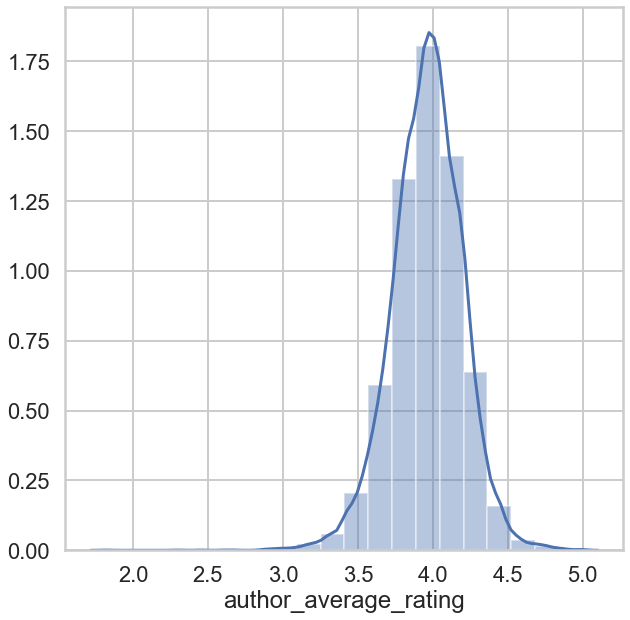

In [62]:
plt.figure(figsize=(10,10))
rating= data.author_average_rating.astype(float)
sns.distplot(rating, bins=20)
plt.show()

<Figure size 1080x720 with 0 Axes>

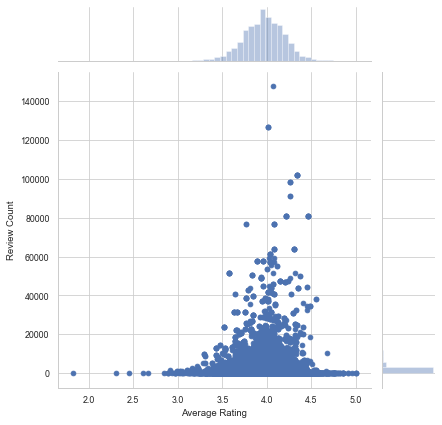

In [63]:
#Checking for any relation between ratings and review counts.
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax =sns.jointplot(x="author_average_rating",y='num_reviews', kind='scatter',  data= data[['num_reviews', 'author_average_rating']])
ax.set_axis_labels("Average Rating", "Review Count")
plt.show()

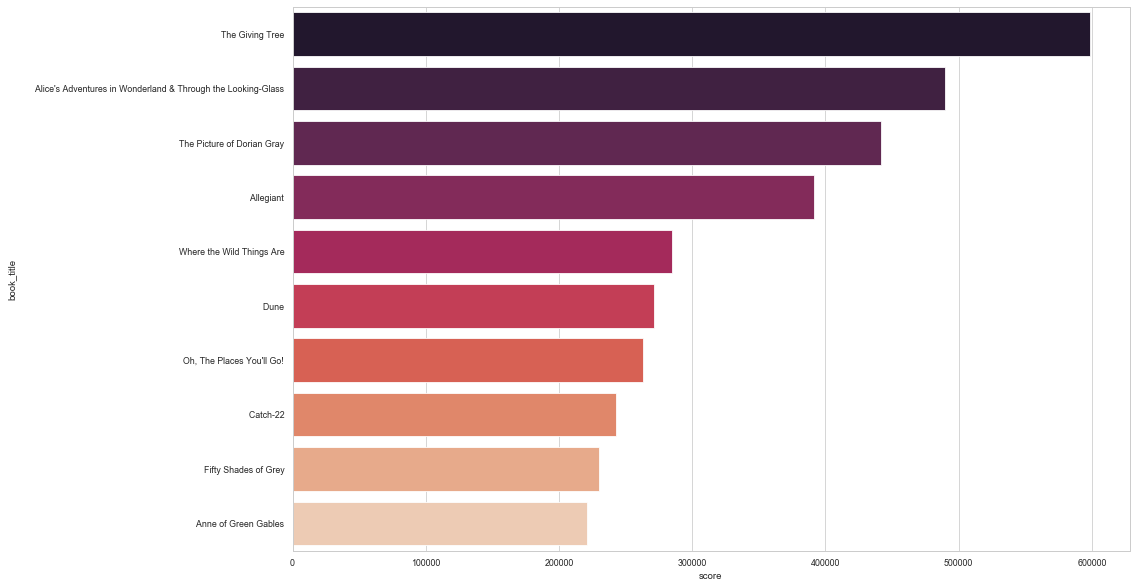

In [64]:
most_rated = data.sort_values('score', ascending = False).head(10).set_index('book_title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['score'], most_rated.index, palette='rocket')
plt.show()

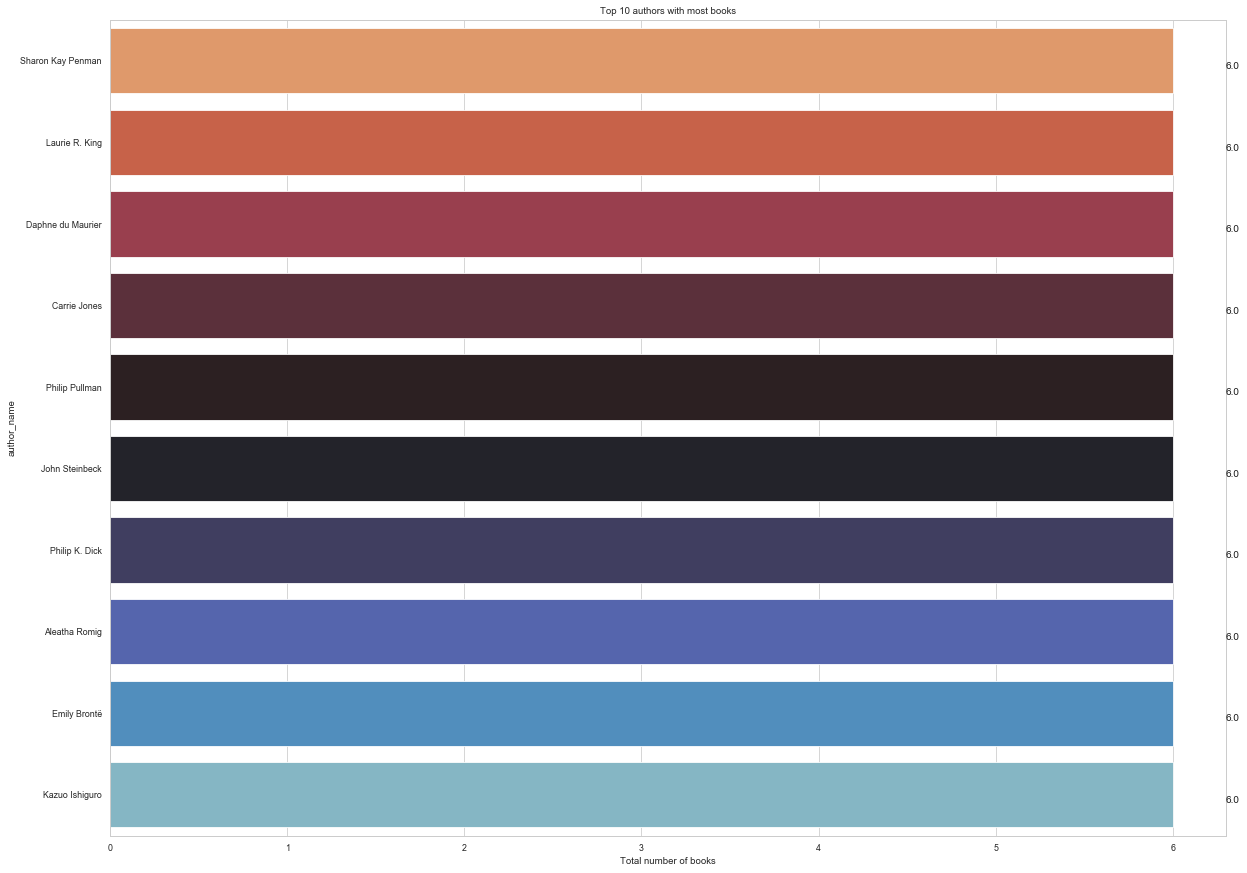

In [65]:
sns.set_context('paper')
most_books = data.groupby('author_name')['book_title'].count().reset_index().sort_values('book_title', ascending=False).head(10).set_index('author_name')
plt.figure(figsize=(20,15))
ax = sns.barplot(most_books['book_title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [66]:
def segregation(data):
    values = []
    for val in data.book_average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    return values

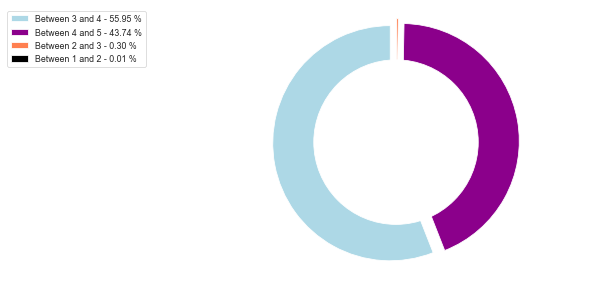

In [67]:
data['Ratings_Dist'] = segregation(data)
ratings_pie = data['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05))
#Draw a circle now:
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
#Equal Aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


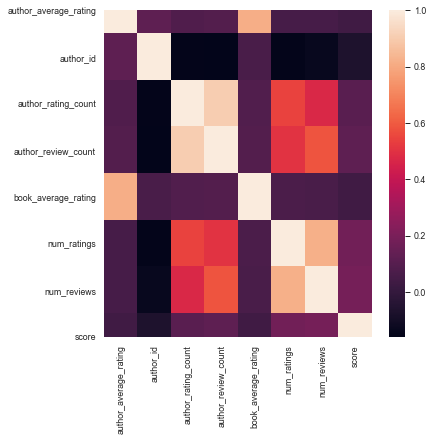

In [68]:
corrArray = data.corr()
plt.figure(figsize=(6,6))
print(sns.heatmap(corrArray))

<Figure size 1152x1152 with 0 Axes>

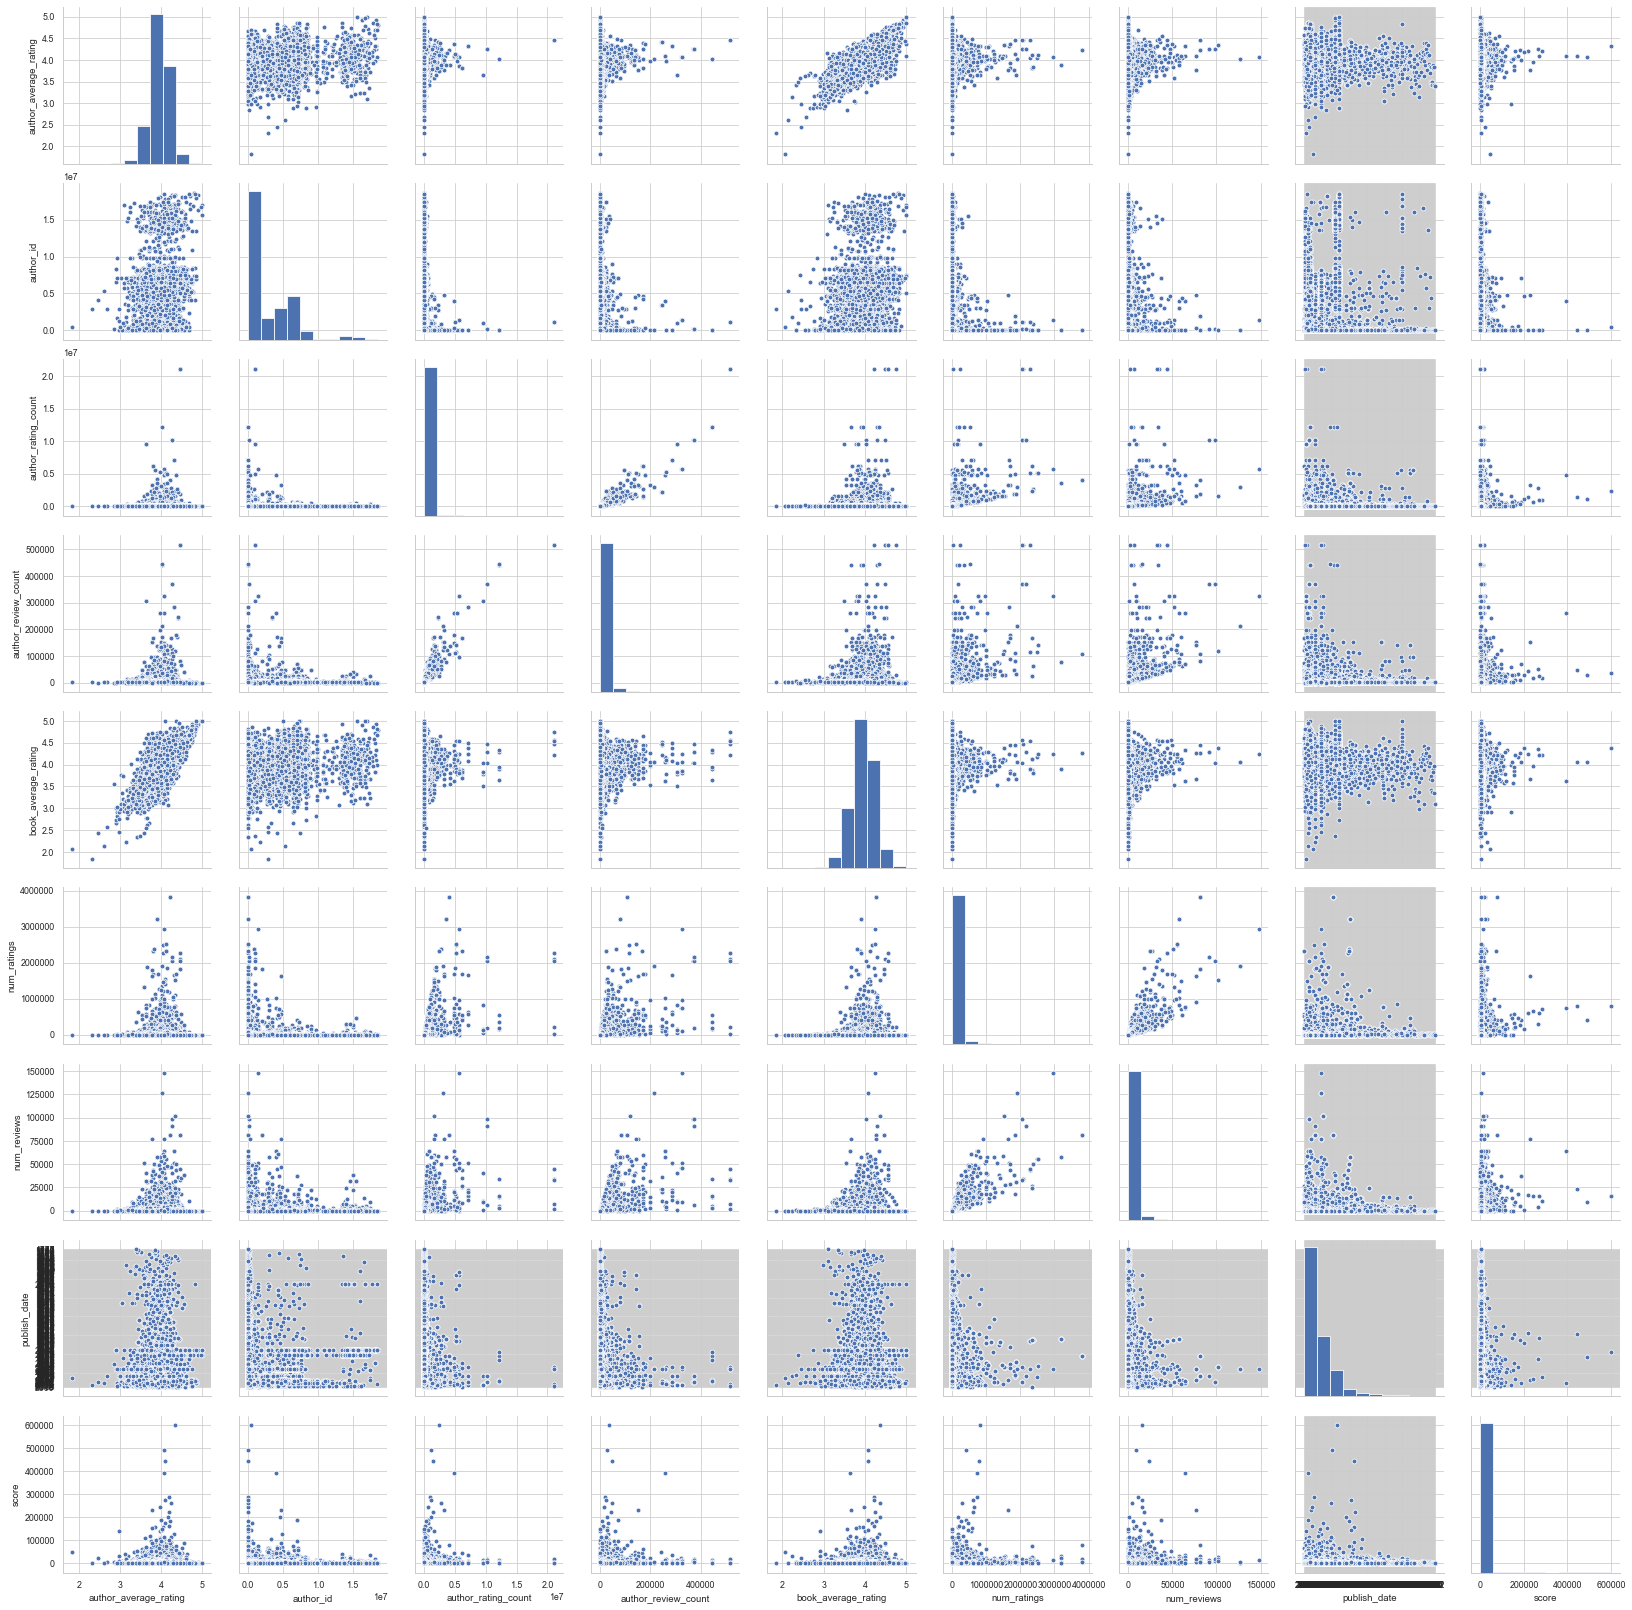

In [69]:
plt.figure(figsize=(16,16))
sns.pairplot(data)

In [70]:
toc = timeit.default_timer()-tic
print("The time in seconds for this code:",toc)

The time in seconds for this code: 104.95474259999992
